# Valyrie Intelligence
## Technical Interview
## Nov 2021
### Jeffrey Kwarsick, PhD

## Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from IPython.display import clear_output
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Layout, interactive, fixed
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
plt.style.use('ggplot')

## Loading in Data

In [3]:
data_dir = "C:\\Users\\Jeff\\Documents\\Anastrian\\Valkyrie Intelligence\\federal_employee_viewpoint_survey\\federal_employee_viewpoint_survey"

In [3]:
os.listdir(data_dir)

['.DS_Store',
 '2018 FEVS PRDF Read Me.docx',
 '2018 PRDF Codebook.xlsx',
 'agency_codes.csv',
 'FEVS_2018_PRDF.csv']

In [4]:
data = pd.read_csv(os.path.join(data_dir, 'FEVS_2018_PRDF.csv'))

In [5]:
data

,AGENCY,LEVEL1,DSEX,DEDUC,DFEDTEN,DSUPER,DMINORITY,DLEAVING,Q1,Q2,...,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,POSTWT,RANDOM
0,XX,XXZZ,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,4.0,5.0,4.0,4.0,3.0,4.0,3.0,4.0,1.861483,112970976817
1,XX,XXZZ,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,...,3.0,2.0,2.0,2.0,1.0,4.0,4.0,3.0,1.861483,194868625278
2,XX,XXZZ,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,1.725254,152966380283
3,XX,XXZZ,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,3.0,3.0,3.0,3.0,4.0,NaN,NaN,4.0,4.427740,193041162980
4,XX,XXZZ,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,...,3.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,1.726921,146655962451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597998,ST,STZZ,A,B,B,B,A,A,5.0,4.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,4.0,5.840522,113488981460
597999,ST,STZZ,B,C,A,A,A,A,2.0,3.0,...,3.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,5.307930,159795404439
598000,ST,ST26,NaN,NaN,NaN,NaN,NaN,A,4.0,4.0,...,3.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,5.613753,145833331088
598001,ST,ST26,B,C,A,A,B,A,5.0,5.0,...,5.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,3.885797,149992944649


## Data Exploration

In [12]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q20,Q28,...,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,POSTWT,RANDOM
count,593452.000000,594618.000000,592301.000000,595361.000000,594820.000000,594967.000000,595789.000000,596179.000000,596010.000000,594870.000000,...,577134.000000,576832.000000,576502.000000,576188.000000,576705.000000,576774.000000,576483.000000,574352.000000,598003.000000,5.980030e+05
mean,3.685233,3.757759,3.591162,3.868418,4.159139,4.023247,4.584601,4.392822,3.967715,4.264372,...,3.348723,3.404206,3.259040,3.044789,3.463034,3.745996,3.576442,3.564544,2.498140,1.500107e+11
std,1.126216,1.011055,1.201737,1.085000,0.900071,0.961843,0.646858,0.718815,1.001281,0.803857,...,1.151052,1.181717,1.139478,1.230432,1.125605,1.066149,1.143488,1.107723,1.446796,2.887598e+10
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.715989,1.000002e+11
25%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.553729,1.250054e+11
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.998884,1.499684e+11
75%,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.962978,1.750236e+11
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,21.957053,1.999999e+11


In [24]:
data.dtypes

AGENCY      object
LEVEL1      object
DSEX        object
DEDUC       object
DFEDTEN     object
            ...   
Q69        float64
Q70        float64
Q71        float64
POSTWT     float64
RANDOM       int64
Length: 81, dtype: object

Let's look at all the columns in the dataset and see waht fraction of columns have NaN values present.

In [17]:
def calc_NaNs(df):
    """
    returns fraction of each column that is null (NaN)
    """
    return pd.DataFrame(df.isna().sum() / df.shape[0])

nulls = calc_NaNs(data)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nulls)

                  0
AGENCY     0.000000
LEVEL1     0.000000
DSEX       0.132274
DEDUC      0.129397
DFEDTEN    0.122200
DSUPER     0.106959
DMINORITY  0.146014
DLEAVING   0.050443
Q1         0.007610
Q2         0.005661
Q3         0.009535
Q4         0.004418
Q5         0.005323
Q6         0.005077
Q7         0.003702
Q8         0.003050
Q9         0.009288
Q10        0.006824
Q11        0.012655
Q12        0.005154
Q13        0.005717
Q14        0.003095
Q15        0.004343
Q16        0.004938
Q17        0.004284
Q18        0.003503
Q19        0.002391
Q20        0.003333
Q21        0.004313
Q22        0.005955
Q23        0.005254
Q24        0.004532
Q25        0.004811
Q26        0.004244
Q27        0.005962
Q28        0.005239
Q29        0.004868
Q30        0.017548
Q31        0.017485
Q32        0.021495
Q33        0.018448
Q34        0.017844
Q35        0.016267
Q36        0.019336
Q37        0.017336
Q38        0.020002
Q39        0.017410
Q40        0.017898
Q41        0.017599


All of the questions in the survey and demographic information have missing values.  I wonder what would happen when I drop rows with missing values.  How many rows would I be left with? <br>
Additionally, I know that I can likely fill in the missing values for the questionaire with the average values (rounded to the nearest whole number).  Should consider whether I should do the fillna values based on the whole government, or conduct it by government agency. <br>
The demographic information cannot be filled in with average values.  Perhaps the only rows that should be dropped should be those rows with missing demographic information.

In [6]:
data.dropna().shape[0] / data.shape[0]

0.7008392934483606

In [7]:
data_dropna = data.dropna()

Dropping all of the rows with missing values leaves me with ~70% of the values.

## Task A -- Data Visualization

Male/Female Breakdown for all surveyed

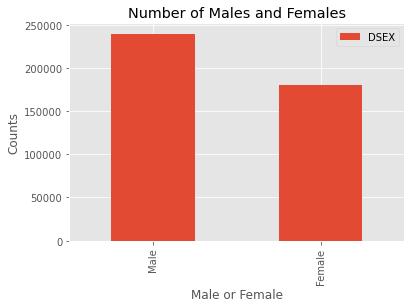

In [6]:
ax = data_dropna.DSEX.value_counts().plot(kind='bar')
ax.set_xticklabels(['Male', 'Female'])
plt.title("Number of Males and Females")
plt.xlabel('Male or Female')
plt.ylabel('Counts')
plt.legend()
plt.show()

Pie Chart of Breakdown of Number of People at AGENCY level

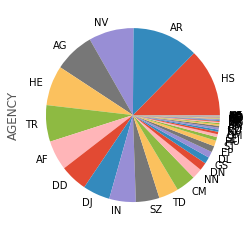

<Figure size 1440x1440 with 0 Axes>

In [7]:
ax = data_dropna.AGENCY.value_counts().plot(kind='pie')
plt.figure(figsize=(20, 20))
plt.show()

In [28]:
# load in the agency codes for an interactive data vis
agency_codes = pd.read_csv(os.path.join(data_dir, "agency_codes.csv"))

### Agency Level Data Visualization (Demographic Information)

In [29]:
layout = widgets.Layout(width='auto', height='40px')
def agency_data_query(data, codes, agencies):
    val = codes.query("dept == @agencies")['code'].values[0]
    out = data.query("AGENCY == @val")
    return out
interact(agency_data_query, data=fixed(data_dropna), codes=fixed(agency_codes), agencies=list(agency_codes.dept.unique()), layout=layout)

interactive(children=(Dropdown(description='agencies', options=('United States Department of the Air Force', '…

<function __main__.agency_data_query(data, codes, agencies)>

In [30]:
def agency_data_vis(data, codes, agencies):
    val = codes.query("dept == @agencies")['code'].values[0]
    out = data.query("AGENCY == @val")
    ###########################################
    out['DSEX'].replace(to_replace={'A': 'Male', 'B': 'Female'}, inplace=True)
    out['DEDUC'].replace(to_replace={'A': 'No Bachelors', 'B': 'Bachelors', 'C': 'Post-Bachelors'}, inplace=True)
    out['DFEDTEN'].replace(to_replace={'A': '<10 years', 'B': '10-20 years', 'C': '>20 years'}, inplace=True)
    out['DSUPER'].replace(to_replace={'A': 'Non-Supervisor', 'B': 'Supervisor'}, inplace=True)
    out['DMINORITY'].replace(to_replace={'A': 'Minority', 'B': 'Non-Minority'}, inplace=True)
    out['DLEAVING'].replace(to_replace={'A': 'No', 'B': 'Yes, Within Fed', 'C': 'Yes, Leave Fed', 'D': 'Other'}, inplace=True)
    ###########################################
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
    ###########################################
    out.DSEX.value_counts().plot(kind='bar', rot=0, ax=axes[0,0], title='Gender Breakdown', ylabel='Counts')
    out.DEDUC.value_counts().plot(kind='bar', rot=0, ax=axes[0,1], title='Education Level', ylabel='Counts')
    out.DFEDTEN.value_counts().plot(kind='bar', rot=0, ax=axes[1,0], title='Tenure Status', ylabel='Counts')
    out.DSUPER.value_counts().plot(kind='bar', rot=0, ax=axes[1,1], title='Supervisor Status', ylabel='Counts')
    out.DMINORITY.value_counts().plot(kind='bar', rot=0, ax=axes[2,0], title='Minority Status', ylabel='Counts')
    out.DLEAVING.value_counts().plot(kind='bar', rot=0, ax=axes[2,1], title='Leaving Status', ylabel='Counts')
    fig.suptitle(f"{agencies}")
    plt.show()



interact(agency_data_vis,
         data=fixed(data_dropna),
         codes=fixed(agency_codes),
         agencies=list(agency_codes.dept.unique()),
         layout={'width': 'max-content'})

interactive(children=(Dropdown(description='agencies', options=('United States Department of the Air Force', '…

<function __main__.agency_data_vis(data, codes, agencies)>

### Heatmap Demographic Information and Leaving Federal Agency

In [31]:
import plotly.io as pio
pio.renderers.default = 'colab'
demos_select = ['DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER', 'DMINORITY']
def df_to_plotly(df):
    return {'z': df.iloc[:,2].tolist(),
            'x': df.iloc[:,0].tolist(),
            'y': df.iloc[:,1].tolist()}

def leaving_status_breakdown_vis(data, codes, agencies, demographic):
    val = codes.query("dept == @agencies")['code'].values[0]
    out = data.query("AGENCY == @val")
    ###########################################
    out['DSEX'].replace(to_replace={'A': 'Male', 'B': 'Female'}, inplace=True)
    out['DEDUC'].replace(to_replace={'A': 'No Bachelors', 'B': 'Bachelors', 'C': 'Post-Bachelors'}, inplace=True)
    out['DFEDTEN'].replace(to_replace={'A': '<10 years', 'B': '10-20 years', 'C': '>20 years'}, inplace=True)
    out['DSUPER'].replace(to_replace={'A': 'Non-Supervisor', 'B': 'Supervisor'}, inplace=True)
    out['DMINORITY'].replace(to_replace={'A': 'Minority', 'B': 'Non-Minority'}, inplace=True)
    out['DLEAVING'].replace(to_replace={'A': 'No', 'B': 'Yes, Within Fed', 'C': 'Yes, Leave Fed', 'D': 'Other'}, inplace=True)
    ###########################################
    heatmap = pd.DataFrame(out.groupby([demographic])['DLEAVING'].value_counts())
    heatmap.rename(columns={'DLEAVING': 'counts'}, inplace=True)
    heatmap = heatmap.reset_index()
    fig = go.Figure(data=go.Heatmap(df_to_plotly(heatmap)))
    fig.update_layout(title=f"{agencies}")
    fig.show()
    
interact(leaving_status_breakdown_vis,
         data=fixed(data_dropna),
         codes=fixed(agency_codes),
         agencies=list(agency_codes.dept.unique()),
         demographic = demos_select,
         layout={'width': 'max-content'})

interactive(children=(Dropdown(description='agencies', options=('United States Department of the Air Force', '…

<function __main__.leaving_status_breakdown_vis(data, codes, agencies, demographic)>

## Task B -- Prediction
Example From Valkyrie <br>
**Federal Employees’ Feelings**: The client may want to predict what departments will experience significant turnover or better understand which departments may need additional training or support.

To build a model to predict turnover, I will want to use the results from the questionaire as well as the demographic information.  Below are some thoughts and considerations for the model.
- Want to include the demographic information -- need to encode the categorical variables for each of the categories.
    - This would be done with OneHotEncoding -- to not make the values hierarchical.
- There are 71 questions in the questionaire.  To start, I think that I will include each of the individual question responses.  Perhaps, if time permitting, I will average the results of each responder into 5 categories as defined in the provided codebook for this dataset.
    - These categories are:
        - My Work Experience (Q1 - Q19)
        - My Work Unit (Q20 - Q28)
        - My Agency (Q29 - Q41)
        - My Work Experience (Q42 - Q62)
        - My Satisfaction (Q63 - Q71)
    - For some of these questions, there is a 6th option (I Don't Know) represented by an 'X'.  To handle this, my plan is to convert all occurences of this X to 0.
- After I have prepared the data, I will build a multiclassification model to conduct the prediction of turnover and will go from there
- Presently not sure what to do with the statistical weight column in the dataset
- Will not use the RANDOM column
- This first model that I will build will likely not have very good sense at determining the turnover rate for a specific Govt Agency or Sub-Agency, rather it will look at the Govt as a whole.  Perhaps I should include the agencies and sub-agencies in the model --> encoding the values as well.  Will think about this.  I think that I will have to OneHotEncode the data for the agencies and sub-agencies if I include them in the model.

### Preparing the Data for the Model

In [33]:
# create list of questions
qs = [f"Q{i}" for i in range(1,72,1)]
# input columns (demographics) that are 
demos_select = ['DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER', 'DMINORITY']

In [10]:
data_dropna[data_dropna.isin(['X']).any(axis=1)]
# there are 151940 rows where the sixth option in the questionaire (I Don't Know, 'X') appears in the data

,AGENCY,LEVEL1,DSEX,DEDUC,DFEDTEN,DSUPER,DMINORITY,DLEAVING,Q1,Q2,...,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,POSTWT,RANDOM
37,AR,ARCE,A,C,A,A,B,B,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,1.869401,175160776346
44,AR,ARCE,A,C,C,A,B,A,4.0,4.0,...,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.836941,198451292187
46,AR,ARCE,A,C,A,B,B,A,4.0,4.0,...,3.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,1.777197,188296248897
48,AR,ARCE,B,B,A,A,B,A,5.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.193884,178060273675
49,AR,ARCE,A,C,A,A,B,B,2.0,2.0,...,1.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,1.437211,182950016242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597975,ST,STZZ,A,C,A,A,B,C,2.0,2.0,...,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.182640,124753980117
597990,ST,STZZ,A,A,A,A,B,D,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.579095,138486365759
597991,ST,ST14,B,C,B,A,B,A,3.0,2.0,...,4.0,3.0,4.0,2.0,3.0,4.0,2.0,4.0,1.829293,142672264130
597994,ST,STZZ,B,C,B,A,A,A,3.0,3.0,...,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.232731,123278140520


In [11]:
data_dropna.replace('X', 0, inplace=True)

C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# cast the Questions to integers after converting the X to 0
data_dropna[qs] = data_dropna[qs].astype(int)
data_dropna.head(10)

C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AGENCY,LEVEL1,DSEX,DEDUC,DFEDTEN,DSUPER,DMINORITY,DLEAVING,Q1,Q2,...,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,POSTWT,RANDOM
35,AR,ARCE,A,B,A,A,A,A,4,4,...,3,4,4,3,4,5,4,5,1.584745,180563326403
36,AR,ARCE,A,A,A,A,B,B,3,2,...,2,3,2,3,2,2,4,4,1.486504,173832153842
37,AR,ARCE,A,C,A,A,B,B,5,4,...,5,5,5,5,5,4,5,4,1.869401,175160776346
38,AR,ARCE,B,A,B,A,B,B,2,1,...,2,3,2,1,3,4,4,4,1.437046,173060526266
39,AR,ARCE,A,B,A,A,B,A,2,5,...,5,4,4,2,2,4,4,4,1.486504,143121577679
42,AR,ARCE,B,C,B,A,B,D,2,4,...,2,4,3,2,3,4,4,4,1.179178,197365764014
43,AR,ARCE,B,C,A,A,A,B,4,4,...,4,4,4,4,4,4,4,4,1.602880,182219263576
44,AR,ARCE,A,C,C,A,B,A,4,4,...,4,3,3,3,3,4,4,4,1.836941,198451292187
45,AR,ARCE,A,A,A,A,B,A,3,4,...,4,5,4,3,4,3,5,4,1.902388,116710271089
46,AR,ARCE,A,C,A,B,B,A,4,4,...,3,3,4,4,4,3,4,4,1.777197,188296248897


In [13]:
features_to_use = demos_select + qs
print(features_to_use)

['DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER', 'DMINORITY', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71']


In [14]:
X = data_dropna[features_to_use]
y = data_dropna['DLEAVING']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419104 entries, 35 to 598001
Data columns (total 76 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DSEX       419104 non-null  object
 1   DEDUC      419104 non-null  object
 2   DFEDTEN    419104 non-null  object
 3   DSUPER     419104 non-null  object
 4   DMINORITY  419104 non-null  object
 5   Q1         419104 non-null  int32 
 6   Q2         419104 non-null  int32 
 7   Q3         419104 non-null  int32 
 8   Q4         419104 non-null  int32 
 9   Q5         419104 non-null  int32 
 10  Q6         419104 non-null  int32 
 11  Q7         419104 non-null  int32 
 12  Q8         419104 non-null  int32 
 13  Q9         419104 non-null  int32 
 14  Q10        419104 non-null  int32 
 15  Q11        419104 non-null  int32 
 16  Q12        419104 non-null  int32 
 17  Q13        419104 non-null  int32 
 18  Q14        419104 non-null  int32 
 19  Q15        419104 non-null  int32 
 20  Q16

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ColumnTransformer([
    ('categorical', OneHotEncoder(), demos_select),
    ('numeric', 'passthrough', qs)
])

In [16]:
features.fit(X)

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 ['DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER',
                                  'DMINORITY']),
                                ('numeric', 'passthrough',
                                 ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                  'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                  'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                  'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                                  'Q27', 'Q28', 'Q29', 'Q30', ...])])

In [17]:
X_transformed = features.transform(X)
print('Shape of transformed data matrix: ', X_transformed.shape)

Shape of transformed data matrix:  (419104, 83)


### Model Construction -- MultiClass Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:", X_train.shape)
print("Shape of the test data set:", X_test.shape)

Shape of the complete data set: (419104, 76)
Shape of the train data set: (293372, 76)
Shape of the test data set: (125732, 76)


In [21]:
lr_pipe = Pipeline([('features', features),
                    ('scaler', StandardScaler()),
                    ('lr', LogisticRegression())])

lr_pipe.fit(X_train, y_train);

In [24]:
def model_evaluation(model, X, y_true):
    y_pred = model.predict(X)
    scores = {}
    scores['accuracy'] = round(metrics.accuracy_score(y_true, y_pred), 4)
    scores['precision'] = round(metrics.precision_score(y_true, y_pred, average='macro'), 4)
    scores['recall'] = round(metrics.recall_score(y_true, y_pred, average='macro'), 4)
    probs = model.predict_proba(X).T[1]
    #precisions, recalls, thresholds = metrics.precision_recall_curve(y_true, probs)
    #scores['area under precision-recall curve'] = round(metrics.auc(recalls, precisions), 4)
    return scores

def print_model_evaluation(model_name, scores):
    print('{} evaluation \n'.format(model_name))
    for metric, score in scores.items():
        print('Test {}: {}'.format(metric, score))

In [25]:
lr_pipe_score = model_evaluation(lr_pipe, X_test, y_test)
print_model_evaluation('Logistic regression', lr_pipe_score)

Logistic regression evaluation 

Test accuracy: 0.7125
Test precision: 0.4689
Test recall: 0.3344


[[81887  3232    34   807]
 [14220  6958    77   570]
 [ 2860  1778    74   167]
 [10098  2268    36   666]]


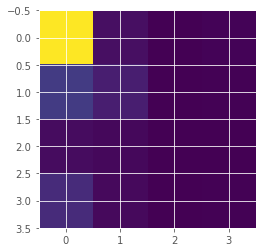

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = lr_pipe.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
print(lr_confusion_matrix)
plt.imshow(lr_confusion_matrix)

The model that I constructed predicts the likelihood of a federal employee leaving their position. <br>
The output `DLEAVING` has 4 options:
- **A**: No (not leaving position)
- **B**: Yes, taking another Federal job
- **C**: Yes, taking job outside Federal Govt
- **D**: Other <br>
Overall, the accuracy (number of correct predictions divided by the total number of observations), precision (TP/(TP + FP)), and recall (TP/(TP + FN)) of the model is not that good.

## Task F
If you predicted or recommended something in Part 1, there is a good chance that the predictive power was weak. Please explain what you would you do to improve performance. What changes in data, features, algorithms, etc. would you make?

Above, I attempted to predict whether or not a Federal employee is going to stay at their position, leave their position for another federal agency, leave their position to exit the federal govt, or other.  As stated above, the model did not have strong accuracy, precision, or recall.  Below are some of my thoughts of how the model could be improved.
- I think that my decision to OneHotEncode the categorical demographic variable (`DSEX`, `DEDUC`, `DFEDTEN`, `DSUPER`, and `DMINORITY`) was the correct move.  I would not change this to improve performance because OrdinalEncoding would create a hierarchy for the variables within each category.
- One of the outputs in `DLEAVING` might be causing some weakness in the predictive power of the model.  This is option `D` (Other).  This is an ambiguous option filled in by the Federal Employee.  This option was selected by 43824 Federal employees (see query below) or roughly 10%% of participants in the survey.  It might be helpful to have a supplementary dataset that clarifies the thoughts of those employees that selected the 'Other' option.
- Looking at my model and the survey, I think my decision to leave the answers to the survey questions as numerics could also be affecting the performance of the model.  The numeric values are a proxy for the categorical variables: Strongly Agree, Agree, Neither Disagree or Agree, Disagree, Strongly Disagree, and Do Not Know.  Leaving as numerics creates the issue of using ordinal encoding for categorical variables, i.e. that strongly agree is 5 times more important than strongly disagree.  In another iteration of the model, converting the question answers with a OneHotEncoding could potentially improve the performance.
- I did not include the agency or sub-agency in the model.  This could be important for gaining clarity about which agencies could have a greater risk of employee turnover.  As it currently stands, the model does not consider agency, resulting in a more generic model of predicting employee turnover.  I would include them in a second iteration of the model.
- Perhaps a different model would result in better performance.  One such option would be the Random Forest Classifier (RFC).
    - RFCs performs better with more categorical data than numeric.  Considering all the data in this dataset is categorical, building a RFC model would be beneficial.
    - It is an ensemble method, buiding many decision trees.  Many outperform the individual through committee.

In [8]:
data_dropna[data_dropna['DLEAVING'].isin(['D'])]

,AGENCY,LEVEL1,DSEX,DEDUC,DFEDTEN,DSUPER,DMINORITY,DLEAVING,Q1,Q2,...,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,POSTWT,RANDOM
42,AR,ARCE,B,C,B,A,B,D,2.0,4.0,...,2.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.179178,197365764014
47,AR,ARCE,A,B,C,A,B,D,5.0,5.0,...,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.777081,147147681912
61,AR,ARCE,B,A,A,A,A,D,4.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,3.0,5.0,1.725850,178411014041
98,AR,ARCE,A,C,A,B,B,D,4.0,3.0,...,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.942616,131858035564
118,AR,ARCE,B,B,B,A,B,D,2.0,4.0,...,4.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,1.571692,133992681482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597918,ST,ST20,A,C,A,A,B,D,4.0,4.0,...,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,3.723842,115685623333
597923,ST,STZZ,B,C,A,A,A,D,4.0,3.0,...,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,5.102152,157791211017
597968,ST,STZZ,A,C,B,B,A,D,2.0,4.0,...,3.0,2.0,1.0,1.0,4.0,2.0,4.0,1.0,5.284671,131704661125
597977,ST,STZZ,A,B,B,A,B,D,3.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.931791,189671173500


### Second Model Attempt -- Logistic Regression with Agency (No Sub Agency)
- add the agency to the features and build the model again

In [35]:
agency_list = ['AGENCY']
features_to_use = agency_list + demos_select + qs
print(features_to_use)

['AGENCY', 'DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER', 'DMINORITY', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71']


In [48]:
X = data_dropna[features_to_use]
y = data_dropna['DLEAVING']

In [42]:
features = ColumnTransformer([
    ('categorical', OneHotEncoder(), agency_list + demos_select),
    ('numeric', 'passthrough', qs)
])
features.fit(X)

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 ['AGENCY', 'DSEX', 'DEDUC', 'DFEDTEN',
                                  'DSUPER', 'DMINORITY']),
                                ('numeric', 'passthrough',
                                 ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                  'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                  'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                  'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                                  'Q27', 'Q28', 'Q29', 'Q30', ...])])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:", X_train.shape)
print("Shape of the test data set:", X_test.shape)

Shape of the complete data set: (419104, 77)
Shape of the train data set: (293372, 77)
Shape of the test data set: (125732, 77)


In [44]:
lr_pipe = Pipeline([('features', features),
                    ('scaler', StandardScaler()),
                    ('lr', LogisticRegression())])

lr_pipe.fit(X_train, y_train);

In [45]:
lr_pipe_score = model_evaluation(lr_pipe, X_test, y_test)
print_model_evaluation('Logistic regression v2', lr_pipe_score)

Logistic regression v2 evaluation 

Test accuracy: 0.7156
Test precision: 0.4757
Test recall: 0.3435


There is a _slight_ change in performance with the incorporating `AGENCY` into a logistic regression model.

### Third Attempt -- Logistic Regression III
- includes Agency like in model 2
- converts the questions into categorical columns

In [46]:
agency_list = ['AGENCY']
features_to_use = agency_list + demos_select + qs
print(features_to_use)

['AGENCY', 'DSEX', 'DEDUC', 'DFEDTEN', 'DSUPER', 'DMINORITY', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71']


In [47]:
X = data_dropna[features_to_use]
y = data_dropna['DLEAVING']

In [49]:
features = ColumnTransformer([
    ('categorical', OneHotEncoder(), features_to_use)
])
features.fit(X)

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 ['AGENCY', 'DSEX', 'DEDUC', 'DFEDTEN',
                                  'DSUPER', 'DMINORITY', 'Q1', 'Q2', 'Q3', 'Q4',
                                  'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                                  'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
                                  'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
                                  'Q24', ...])])

In [57]:
features.named_transformers_['categorical'].categories_

[array(['AF', 'AG', 'AM', 'AR', 'BG', 'BO', 'CM', 'CT', 'CU', 'DD', 'DJ',
        'DL', 'DN', 'DR', 'ED', 'EE', 'EP', 'FC', 'FQ', 'FT', 'GS', 'HE',
        'HF', 'HS', 'HU', 'IB', 'IN', 'KS', 'NF', 'NL', 'NN', 'NQ', 'NU',
        'NV', 'OM', 'RR', 'SB', 'SE', 'SK', 'SN', 'ST', 'SZ', 'TD', 'TR',
        'XX'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:", X_train.shape)
print("Shape of the test data set:", X_test.shape)

Shape of the complete data set: (419104, 77)
Shape of the train data set: (293372, 77)
Shape of the test data set: (125732, 77)


In [55]:
lr_pipe = Pipeline([('features', features),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('lr', LogisticRegression(solver='liblinear'))])

lr_pipe.fit(X_train, y_train);

In [56]:
lr_pipe_score = model_evaluation(lr_pipe, X_test, y_test)
print_model_evaluation('Logistic regression v3', lr_pipe_score)

Logistic regression v3 evaluation 

Test accuracy: 0.7156
Test precision: 0.4788
Test recall: 0.3443


_Slight_ improvement in the precision of the model, but only very slight.

### Fourth Model Attempt -- Random Forest Classifier
- include agency like lr v2 and lr v3
- convert qs to categorical variables as well, as in lr v3

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline([('features', features),
                    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_gs = GridSearchCV(rf_pipe, 
                     cv=5, 
                     param_grid={'rf__max_depth': range(3, 10)}
                    )
rf_gs.fit(X_train, y_train)

rf_gs_scores = model_evaluation(rf_gs, X_test, y_test)
print_model_evaluation('Random forest', rf_gs_scores)

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random forest evaluation 

Test accuracy: 0.7041
Test precision: 0.2997
Test recall: 0.2958


The RFC performed worse overall compared to the Logistic Regression Models that I constructed.

Overall, the construction of a model to predict turnover or retention in federal agencies.
**Other Ideas for Improvement of the Model**
- Obtain more (use data from previous years)
    - Might be some issues with slight variations between the surveys administered, but these issues could be overcome.
- Perhaps the features should be reduced.  Having 71 questions in the survey offers a lot of granularity to gauge the feelings of a Federal Employee, but for the sake of determining whether or not they are satisfied with their job or are looking to leave the Federal Govt or leave the their current agency for another, perhaps certain questions or sections of questions could be selected as more important for the sake of the model.  This could either be done by looking at the questions in the survey and identifying what might be important or through a more analytical technique to identify important questions.
- Can also use the codebook to look at the 71 questions in the survey and attempt to identify questions that have greater significance in determining retention or turnover of Federal Employees.  Categories of questions such as 'My Satisfaction' and 'My Agency' could be more useful for the model.  Reduction could also be achieved more analytically, looking at the feature importance of the model and attempting to limit the number of parameters by selecting the parameters of the greatest importance. 